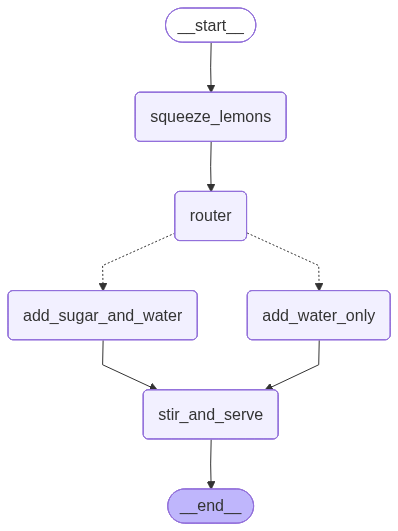


🧪 Sugar = 2
Juice from 4 lemons + 2 spoons sugar + 1 glass water → Stirred and ready to serve!

🧪 Sugar = 0
Juice from 4 lemons + 1 glass water → Stirred and ready to serve!


In [1]:
from langgraph.graph import StateGraph
from typing import TypedDict, Dict, Any
from IPython.display import Image, display

# Define state
class LemonState(TypedDict):
    lemons: int
    sugar: int
    water: str
    juice: str
    mix: str
    final: str

# Real processing nodes
def squeeze_lemons(state: Dict[str, Any]) -> Dict[str, Any]:
    state["juice"] = f"Juice from {state.get('lemons', 0)} lemons"
    return state

def add_sugar_and_water(state: Dict[str, Any]) -> Dict[str, Any]:
    state["mix"] = f"{state['juice']} + {state['sugar']} spoons sugar + {state['water']} water"
    return state

def add_water_only(state: Dict[str, Any]) -> Dict[str, Any]:
    state["mix"] = f"{state['juice']} + {state['water']} water"
    return state

def stir_and_serve(state: Dict[str, Any]) -> Dict[str, Any]:
    state["final"] = f"{state['mix']} → Stirred and ready to serve!"
    return state

# Router node (dummy function that does nothing, just passes state)
def router_node(state: Dict[str, Any]) -> Dict[str, Any]:
    return state

# Decision logic
def check_sugar(state: Dict[str, Any]) -> str:
    return "add_sugar_and_water" if state.get("sugar", 0) > 0 else "add_water_only"

# Build graph
builder = StateGraph(LemonState)
builder.add_node("squeeze_lemons", squeeze_lemons)
builder.add_node("router", router_node)  # 🧠 decision point (actual node)
builder.add_node("add_sugar_and_water", add_sugar_and_water)
builder.add_node("add_water_only", add_water_only)
builder.add_node("stir_and_serve", stir_and_serve)

# Flow setup
builder.set_entry_point("squeeze_lemons")
builder.add_edge("squeeze_lemons", "router")

# Now the router can conditionally branch
builder.add_conditional_edges("router", check_sugar, {
    "add_sugar_and_water": "add_sugar_and_water",
    "add_water_only": "add_water_only"
})

# Connect both to final step
builder.add_edge("add_sugar_and_water", "stir_and_serve")
builder.add_edge("add_water_only", "stir_and_serve")
builder.set_finish_point("stir_and_serve")

# Compile
graph = builder.compile()

# Visualize
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print("Graph visualization failed:", e)

# Test cases
for sugar_amt in [2, 0]:
    print(f"\n🧪 Sugar = {sugar_amt}")
    result = graph.invoke({
        "lemons": 4,
        "sugar": sugar_amt,
        "water": "1 glass",
        "juice": "",
        "mix": "",
        "final": ""
    })
    print(result["final"])
